In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
data.shape

(729322, 11)

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
np.sum(pd.isnull(data))

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [10]:
data['store_and_fwd_flag'] = 1* (data.store_and_fwd_flag.values == 'Y')

In [11]:
data['Check_duration'] =(data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())

In [12]:
Difference_Duration = data[np.abs(data['Check_duration'].values - data['trip_duration'].values) > 1]

In [13]:
Difference_Duration.shape

(0, 12)

In [14]:
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [19]:
data['day_week'] = data['pickup_datetime'].dt.weekday
data['day_hour'] = data['pickup_datetime'].dt.hour

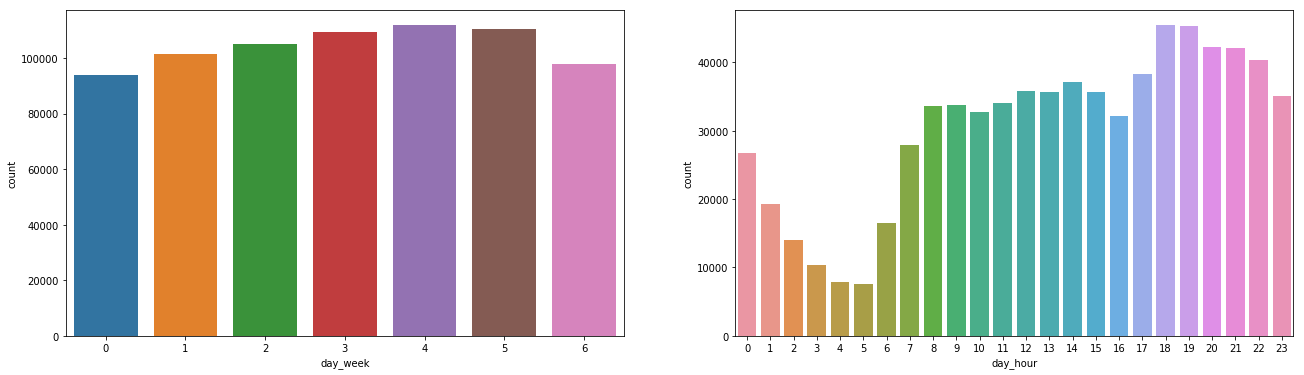

In [25]:
plt.figure(figsize=(22,6))

plt.subplot(121)
sns.countplot(data['day_week'])

plt.subplot(122)
sns.countplot(data['day_hour'])

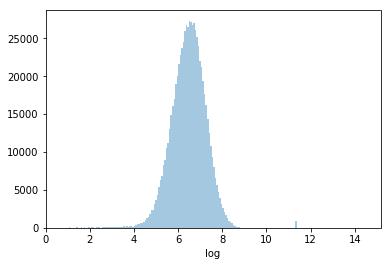

In [27]:
sns.distplot(data['log'],kde = False , bins =200)

In [26]:
data['log'] = np.log(data['trip_duration'].values +1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


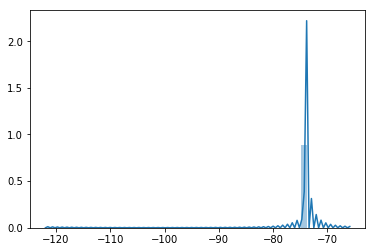

In [29]:
sns.distplot(data['pickup_longitude'].values )

In [32]:
Avergae_weekdays_duration = pd.DataFrame(data.groupby(['day_week'])['trip_duration'].median())

In [35]:
Avergae_weekdays_duration.reset_index(inplace=True)

In [37]:
Avergae_weekdays_duration['Units'] =1

In [38]:
Avergae_weekdays_duration

,day_week,trip_duration,Units
0,0,631,1
1,1,678,1
2,2,697,1
3,3,708,1
4,4,690,1
5,5,636,1
6,6,601,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


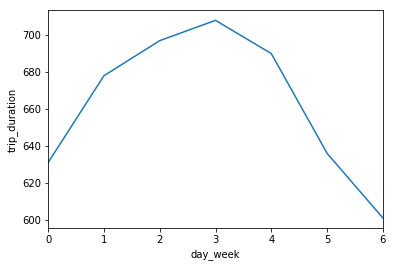

In [41]:
sns.tsplot(Avergae_weekdays_duration , time = 'day_week' , value ='trip_duration',unit ='Units')

In [42]:
Avergae_hour_duration = pd.DataFrame(data.groupby(['day_hour'])['trip_duration'].median())

In [43]:
Avergae_hour_duration.reset_index(inplace=True)

In [45]:
Avergae_hour_duration['Units'] =1

In [46]:
Avergae_hour_duration

,day_hour,trip_duration,Units
0,0,647.0,1
1,1,616.0,1
2,2,593.0,1
3,3,594.0,1
4,4,616.0,1
5,5,528.0,1
6,6,473.5,1
7,7,572.0,1
8,8,661.0,1
9,9,682.0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


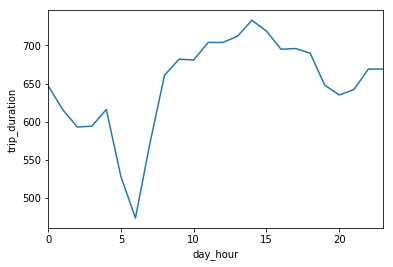

In [51]:
sns.tsplot(Avergae_hour_duration, time ='day_hour', value='trip_duration', unit= 'Units')

In [54]:
mean_weekday_duration = pd.DataFrame(data.groupby(['vendor_id','day_week'])['trip_duration'].mean())

In [55]:
mean_weekday_duration.reset_index(inplace= True)

In [57]:
mean_weekday_duration['Units'] =1

In [58]:
mean_weekday_duration

,vendor_id,day_week,trip_duration,Units
0,1,0,803.222110,1
1,1,1,888.882499,1
2,1,2,875.494919,1
3,1,3,887.208771,1
4,1,4,863.613497,1
5,1,5,775.958505,1
6,1,6,756.111949,1
7,2,0,970.962559,1
8,2,1,1059.411619,1
9,2,2,1063.997373,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


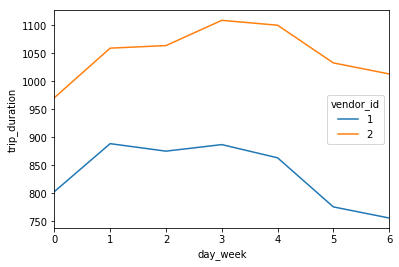

In [60]:
sns.tsplot(mean_weekday_duration , time = 'day_week', value = 'trip_duration' , condition='vendor_id',unit='Units')

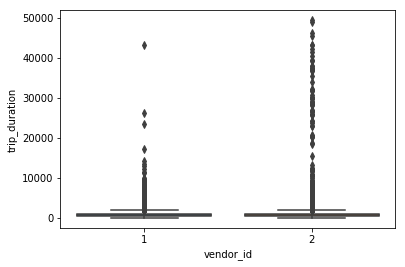

In [53]:
df= data[data['trip_duration']<50000]
sns.boxplot(x='vendor_id',y='trip_duration',data=df)

In [75]:
data['passenger_count'].value_counts()
data_pass = data[data['trip_duration']<10000]

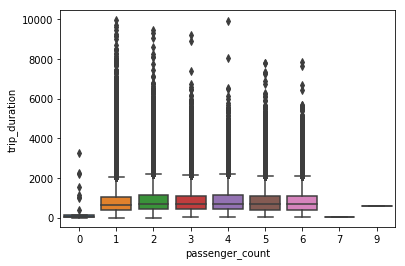

In [76]:
sns.boxplot(x ="passenger_count" , y="trip_duration" , data=data_pass)

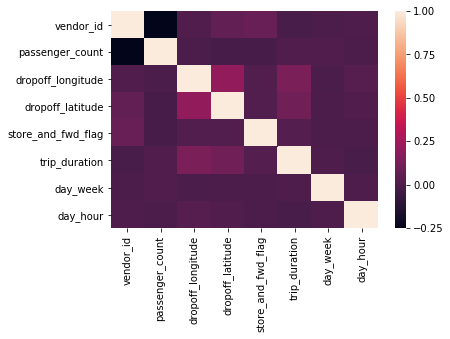

In [81]:
cor_drop = data.drop(['id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','Check_duration','log'],axis =1)

corr = cor_drop.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr)

In [ ]:
# To Find the distance between Longitude and Latitudes

In [83]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 -lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [85]:
distances_km = []

for row in data.itertuples(index=False):
    distances_km.append(
        haversine_distance(row.pickup_latitude,row.pickup_longitude,row.dropoff_latitude,row.dropoff_longitude)
    )

In [86]:
data['Distance_Btw_Longitudes'] = distances_km

In [87]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Check_duration,day_week,day_hour,log,Distance_Btw_Longitudes
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0,0,16,5.993961,1.20
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0,4,23,7.003974,4.13
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0,6,17,7.400010,7.25
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0,1,9,7.040536,2.36
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0,2,6,6.744059,4.33
